<center> 
<h1> <u>EN2550-Assignment 1 </u></h1>
<h1> <u>Intensity Transformations and Neighborhood Filtering </u></h1> 
</center>


***

* Name: B.S.V.W. Munasinghe <br> 
* Index Number: 190397E 

***

* Importing Libraries,

In [2]:
#Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sympy as sy

#To display the figures in the converted PDF/HTML files
%matplotlib inline

***

## Question 1

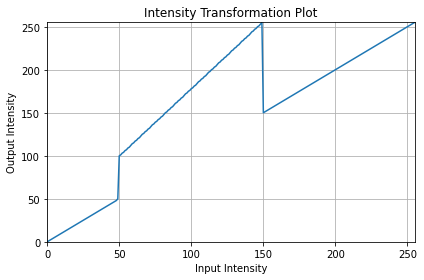

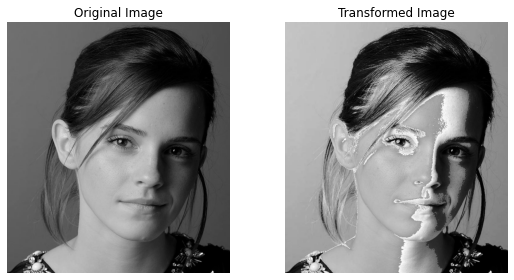

In [85]:
#Creating the transformation array
T1 = np.linspace(0,50,50)
T2 = np.linspace(100,255,100)
T3 = np.linspace(150,255,106)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)

assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_img_)

***

## Question 2

### (a) White Matter

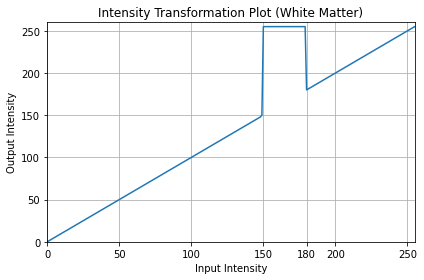

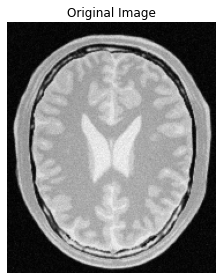

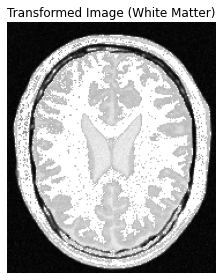

In [99]:
#Creating the transformation array
T1 = np.linspace(0,150,150)
T2 = np.linspace(255,255,30)
T3 = np.linspace(180,255,76)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)
#t = np.arange(255,-1,-1,dtype=np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_xticks([0,50,100,150,180,200,250])
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot (White Matter)")

#Read the image using opencv
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots()
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.set_title("Original Image")
ax.imshow(img_)
fig,ax = plt.subplots()
transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.set_title("Transformed Image (White Matter)")
ax.imshow(transformed_img_)

### (b) Gray Matter

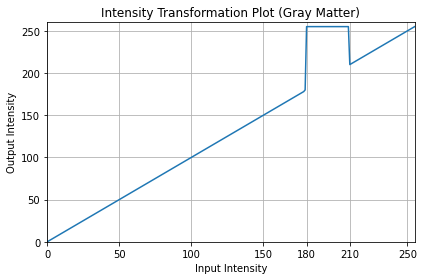

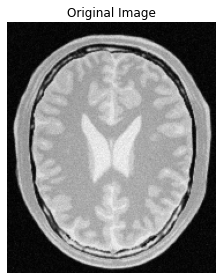

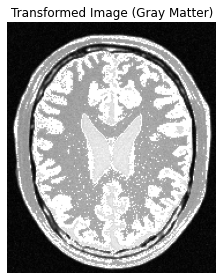

In [100]:
#Creating the transformation array
T1 = np.linspace(0,180,180)
T2 = np.linspace(255,255,30)
T3 = np.linspace(210,255,46)

'''T1 = np.linspace(0,0,180)
T2 = np.linspace(180,255,76)'''

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_xticks([0,50,100,150,180,210,250])
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot (Gray Matter)")

#Read the image using opencv
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots()
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.set_title("Original Image")
ax.imshow(img_)
fig,ax = plt.subplots()
transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.set_title("Transformed Image (Gray Matter)")
ax.imshow(transformed_img_)

## Question 3

### (a)

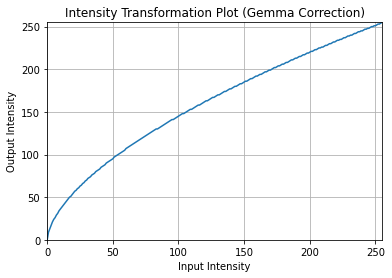

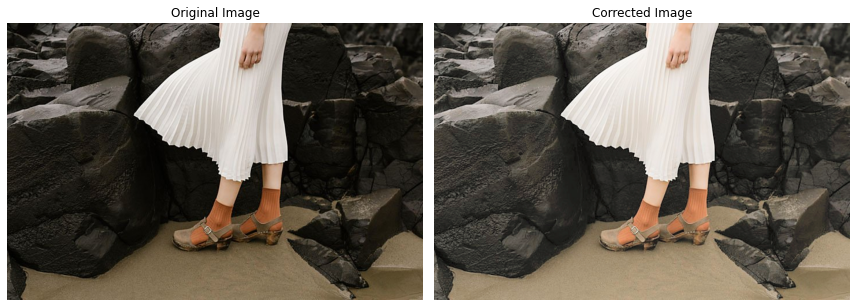

In [3]:
gemma = 0.6
t = np.array([(i/255)**gemma*255 for i in range(0,256)]).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot (Gemma Correction)")

#Read the image using opencv
img = cv.imread('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)

assert img is not None

#Changing the color plane to L*a*b*
img_Lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
img_L = img_Lab[:,:,0]
img_a = img_Lab[:,:,1]
img_b = img_Lab[:,:,2]

#apply the transformation using lookup table
transformed_L = cv.LUT(img_L,t)

#Get the BGR color plane image back by merging sub layers and convert back to BGR
transformed_img = cv.cvtColor(cv.merge([transformed_L,img_a,img_b]),cv.COLOR_Lab2BGR)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(12,6))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Corrected Image")
ax[1].imshow(transformed_img_)




### (b)

Text(0.5, 1.0, 'Histogram of L plane of corrected image')

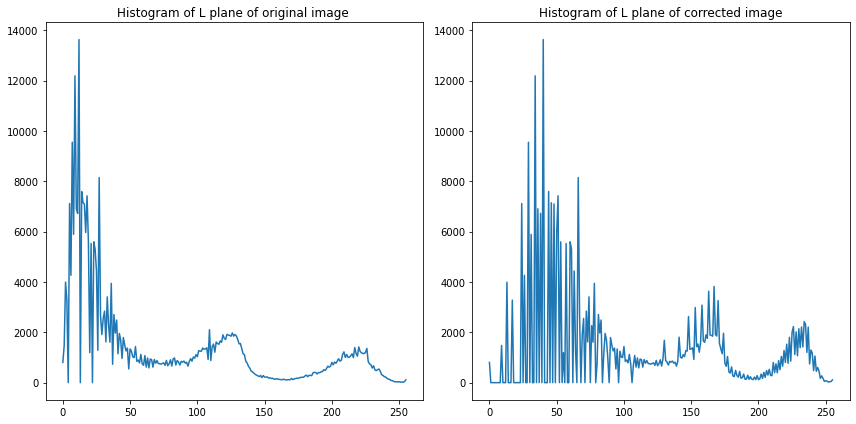

In [4]:
hist_img = cv.calcHist([img_L],[0],None,[256],[0,256])
hist_gemma_img = cv.calcHist([transformed_L],[0],None,[256],[0,256])
fig,ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(hist_img)
ax[0].set_title("Histogram of L plane of original image ")

ax[1].plot(hist_gemma_img)
ax[1].set_title("Histogram of L plane of corrected image")

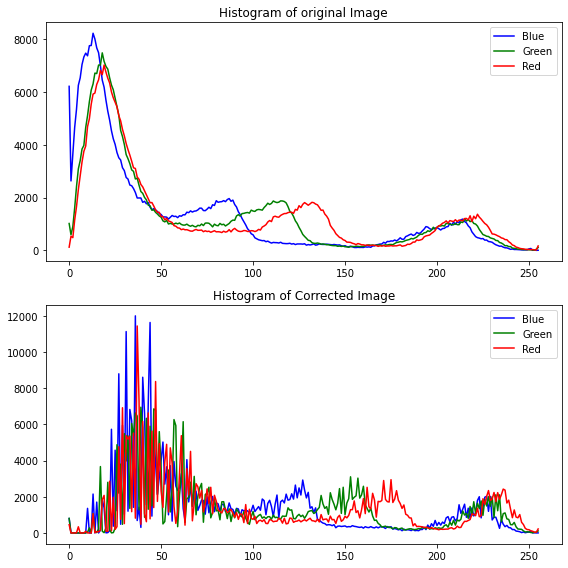

In [11]:
hist_img = cv.calcHist([img],[0],None,[256],[0,256])
hist_gemma_img = cv.calcHist([transformed_img],[0],None,[256],[0,256])

fig,ax = plt.subplots(2,1,figsize=(8,8))
colors = ['b','g','r']
labels = ['Blue','Green','Red']
for i in range (3):
    hist_img = cv.calcHist([img],[i],None,[256],[0,256])
    hist_gemma_img = cv.calcHist([transformed_img],[i],None,[256],[0,256])
    ax[0].plot(hist_img,color=colors[i],label = labels[i])
    ax[0].set_title("Histogram of original Image")
    ax[0].legend()
    ax[1].plot(hist_gemma_img,color=colors[i],label = labels[i])
    ax[1].set_title("Histogram of Corrected Image")
    ax[1].legend()

## Question 4

Transformation generating equation for the Equalizing part:<br>$s_k=\frac{L-1}{MN}\displaystyle\sum_{j=0}^k n_{j}$  <br>  here,<br>$k = 0,1,...,L-1$

In [5]:
def equalizeImage(img,hist):
    
    transf = np.zeros(256)  #Array to store new transformation for equalizer
    MN = img.size   #Image resolution (Number of pixels)
    L = 256         #Number of intensity levels 
    
    #Calculating the transformation according to the equation given above (s_k array)
    for i in range(len(transf)):
        transf[i] = int((L-1)*(sum([hist[j] for j in range(0,i+1)]))/MN)
    
    transf = np.array(transf).astype(np.uint8)  #Change the data type to uint8
    eqalized_img = cv.LUT(img,transf)   #Do the equalizing transformation using lookup table
    
    #Take histograme of the equalized image
    hist = cv.calcHist([eqalized_img],[0],None,[256],[0,256])

    #returning results
    return eqalized_img, hist

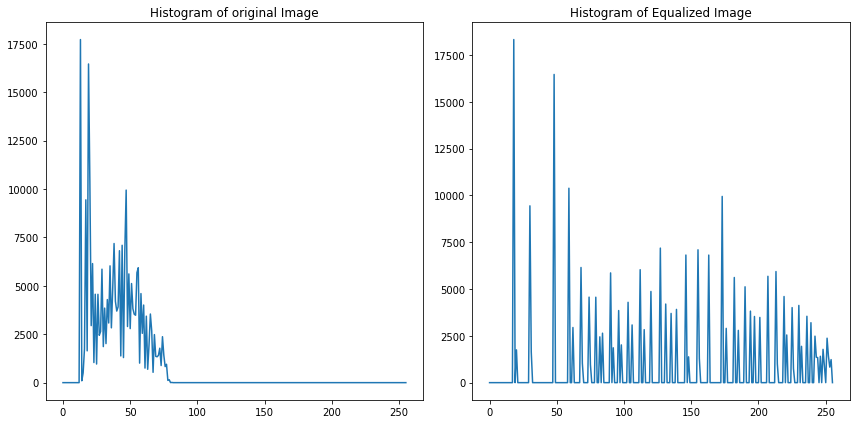

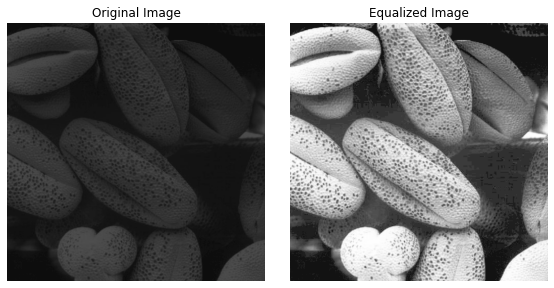

In [6]:
#Read the image using opencv
img = cv.imread('images/shells.png',cv.IMREAD_GRAYSCALE)

assert img is not None

hist_img = cv.calcHist([img],[0],None,[256],[0,256])
new_img,new_hist = equalizeImage(img,hist_img)

fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(hist_img)
ax[0].set_title("Histogram of original Image")
ax[1].plot(new_hist)
ax[1].set_title("Histogram of Equalized Image")

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

new_img_ = cv.cvtColor(new_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Equalized Image")
ax[1].imshow(new_img_)

## Question 5

In [92]:
def zoomImage(img,scale,mode):
    # Scale- amount of zoom
    # mode- nearest-neighbor (mode=0) or bilinear interpolation (mode=1)
    r,c = img.shape[0]*scale,img.shape[1]*scale
    zoomed_img = np.zeros((r,c))
    for i in range(r):
        for j in range(c):
            if mode == 0:
                r_,c_ = roundNeighbour(i,j,img.shape[0],img.shape[1],scale)
                zoomed_img[i][j] = img[r_][c_]           
            elif mode == 1:
                zoomed_img[i][j] = linearInterpolate(i,j,scale,img)
    return zoomed_img.astype(np.uint8)

In [93]:
def roundNeighbour(i,j,r,c,s):
    # Rounding the values to the nearest integer
    i_ = i//s if (i/s - i//s)<0.5 else (i//s + 1)
    j_ = j//s if (j/s - j//s)<0.5 else (j//s + 1)
    # Correcting the overflowed values
    if i_>=r: i_ = r-1   
    if j_>=c: j_ = c-1     
    return i_,j_

In [94]:
def linearInterpolate(i,j,s,img):
    i_float,j_float,i_int,j_int = i/s,j/s,i//s,j//s
    # defining the ratios
    (p,q) = ((i_float-i_int),(j_float-j_int))
    # Handle overflowing array indexes
    if i_int>=img.shape[0] or i_int+1>=img.shape[0]: i_int = img.shape[0]-1
    if j_int>=img.shape[1] or j_int+1>=img.shape[1]: j_int = img.shape[1]-1
    if  i_int+1>=img.shape[0]: i_int = img.shape[0]-2
    if j_int+1>=img.shape[1]: j_int = img.shape[1]-2
    # Point values to do the interpolatin
    point1,point2,point3,point4 = img[i_int][j_int],img[i_int][j_int+1],img[i_int+1][j_int],img[i_int+1][j_int+1]
    # Carry out the linear interpolation
    val1 = p*point3 + (1-p)*point1
    val2 = p*point4 + (1-p)*point2
    return val2*q + val1*(1-q)

In [85]:
def calSSD(im1,im2):
    # This function calculates normalized sum of square differences
    im1 = np.array(im1)
    im2 = np.array(im2)
    SSD = np.sum(np.square(np.subtract(im1,im2)))
    return SSD/im1.size

1080 1920
1080 1920
1200 1920
1200 1920
1460 2400
1460 2400


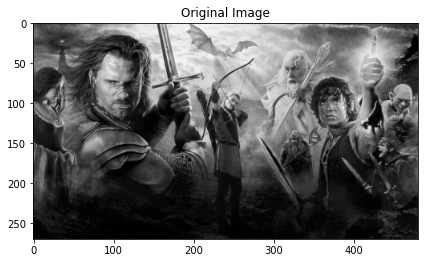

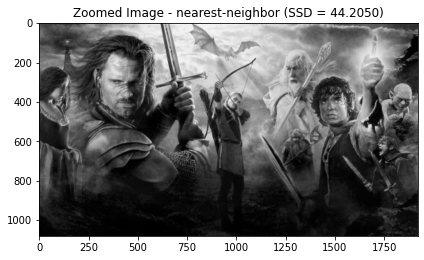

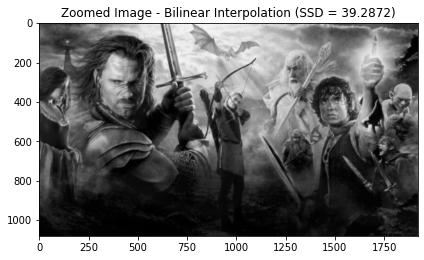

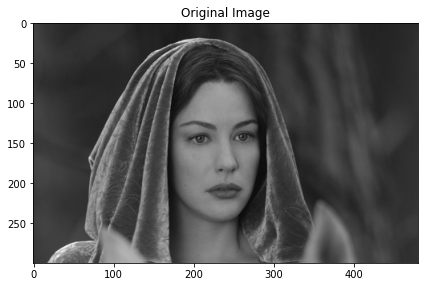

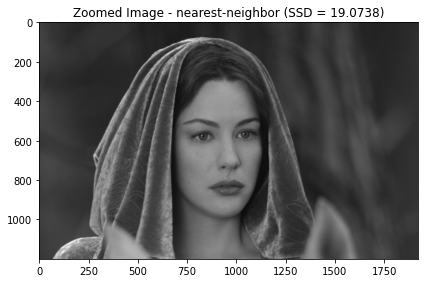

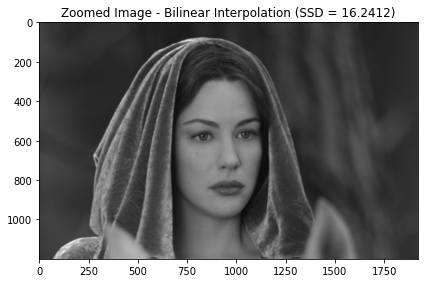

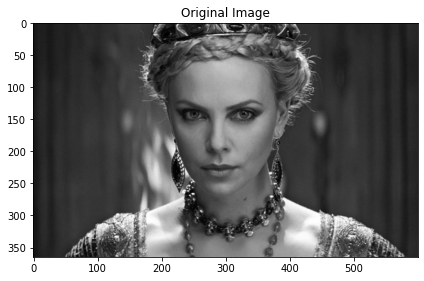

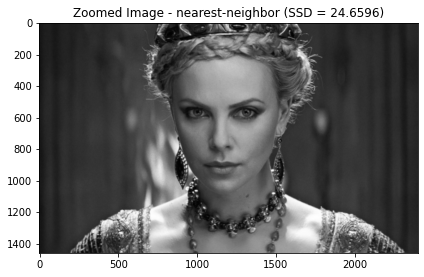

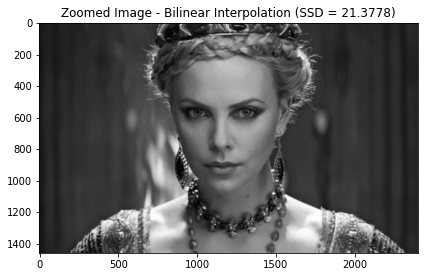

In [98]:
imagesList=['im01','im02','im03']
scale=4
for i in range(3):
    #Read the image using opencv
    img = cv.imread('images/a1q5images/'+imagesList[i]+'small.png',cv.IMREAD_GRAYSCALE)
    assert img is not None

    new_img1 = zoomImage(img,scale,0)   # Zoom image using nearest neighbour
    new_img2 = zoomImage(img,scale,1)   # Zoom image using bilinear interpolation
    given_img = cv.imread('images/a1q5images/'+imagesList[i]+'.png',cv.IMREAD_GRAYSCALE)

    # Calculating the snormalized sum of square differences
    if i==2:
        new_img1 = new_img1[:-1][:]
        new_img2 = new_img2[:-1][:]
        
    ssd1 = calSSD(given_img,new_img1)
    ssd2 = calSSD(given_img,new_img2)

    #display images using opencv
    cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
    cv.imshow('Image',img)
    cv.waitKey(0)
    cv.imshow('Image',new_img1)
    cv.waitKey(0)
    cv.destroyAllWindows()
    cv.imshow('Image',new_img2)
    cv.waitKey(0)
    cv.destroyAllWindows()

    #display images using matplotlib
    fig,ax = plt.subplots()
    img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    ax.set_title("Original Image")
    ax.imshow(img_)

    fig,ax = plt.subplots()

    new_img1_ = cv.cvtColor(new_img1,cv.COLOR_BGR2RGB)
    ax.set_title("Zoomed Image - nearest-neighbor (SSD = %.4f)"%(ssd1))
    ax.imshow(new_img1_)
    fig,ax = plt.subplots()
    new_img2_ = cv.cvtColor(new_img2,cv.COLOR_BGR2RGB)
    ax.set_title("Zoomed Image - Bilinear Interpolation (SSD = %.4f)"%(ssd2))
    ax.imshow(new_img2_)


## Question 6

### (a)

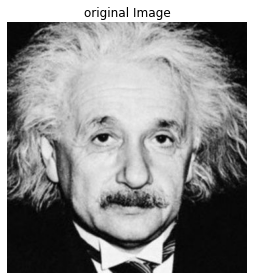

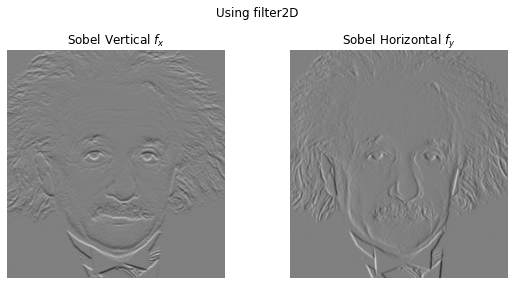

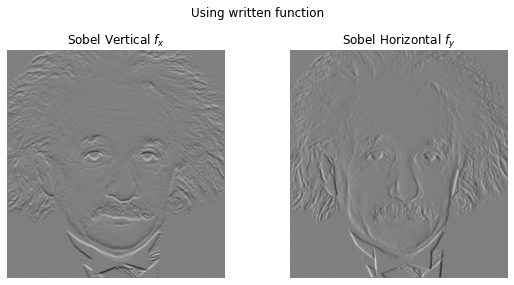

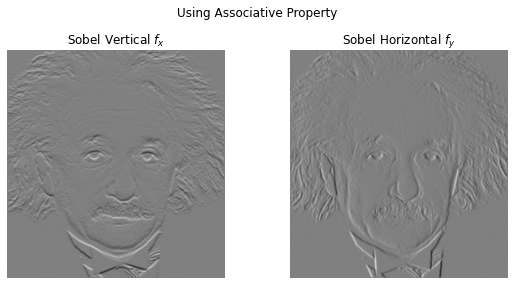

In [55]:
img = cv.imread("images/einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

# The sobel vertical and sobel horizontal windows are initialized here
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)

sobel_v_1 = np.array([[-1],[0],[1]],dtype = np.float32)
sobel_v_2 = np.array([[1,2,1]],dtype = np.float32)

sobel_h_1 = np.array([[1],[2],[1]],dtype = np.float32)
sobel_h_2 = np.array([[-1,0,1]],dtype = np.float32)

# Use 2D convolution function in opencv to get filtered images
img_sobel_v = cv.filter2D(img,-1,sobel_v)
img_sobel_h = cv.filter2D(img,-1,sobel_h)

# Use written function to get filtered image
img_sobel_v_1 = Filter_conv(img,sobel_v,0)
img_sobel_h_1 = Filter_conv(img,sobel_h,0)

#Associative property
img_sobel_v_2 = Filter_conv(img,sobel_v_1,2)
img_sobel_v_2 = Filter_conv(img_sobel_v_2,sobel_v_2,1)

img_sobel_h_2 = Filter_conv(img,sobel_h_1,2)
img_sobel_h_2 = Filter_conv(img_sobel_h_2,sobel_h_2,1)

fig,ax = plt.subplots()

ax.axis('off')
ax.imshow(img,cmap='gray',vmin=0,vmax=255)
ax.set_title("original Image")

fig,ax = plt.subplots(1,2,figsize=(8,4))
fig.suptitle("Using filter2D")
ax[0].axis('off')
ax[0].imshow(img_sobel_v,cmap='gray',vmin=-1020,vmax=1020)
ax[0].set_title("Sobel Vertical $f_x$")

ax[1].axis('off')
ax[1].imshow(img_sobel_h,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")

fig,ax = plt.subplots(1,2,figsize=(8,4))
fig.suptitle("Using written function")
ax[0].axis('off')
ax[0].imshow(img_sobel_v_1,cmap='gray',vmin=-1020,vmax=1020)
ax[0].set_title("Sobel Vertical $f_x$")

ax[1].axis('off')
ax[1].imshow(img_sobel_h_1,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")

fig,ax = plt.subplots(1,2,figsize=(8,4))
fig.suptitle("Using Associative Property")
ax[0].axis('off')
ax[0].imshow(img_sobel_v_2,cmap='gray',vmin=-1020,vmax=1020)
ax[0].set_title("Sobel Vertical $f_x$")

ax[1].axis('off')
ax[1].imshow(img_sobel_h_2,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")
plt.show()

In [48]:
def Filter_conv(img,k,mode):
    # mode variable selects the kernal type
    # mode = 0 := 2D kernel
    # mode = 1 := row kernal
    # mode = 2 := column kernel
    
    k_height,k_width = k.shape[0]//2,k.shape[1]//2
    if(mode==1):k_height=0
    if(mode==2):k_width=0
    
    img_height,img_width = img.shape[0],img.shape[1]

    filtered_img = np.zeros(img.shape,'float32')

    for i in range(k_height,img_height - k_height):
        for j in range(k_width,img_width - k_width):
            filtered_img[i,j] = np.sum(np.multiply(img[(i-k_height):(i+k_height+1),(j-k_width):(j+k_width+1)],k))
    
    return filtered_img  

## Question 7

### (a)

[]

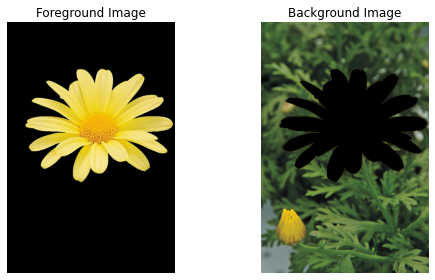

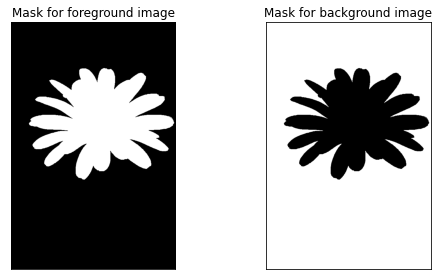

In [8]:
#Read the image using opencv
img = cv.imread('images/daisy.jpg',cv.IMREAD_COLOR)
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,150,600,450)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

#Get the foreground image
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_f = img*mask2[:,:,np.newaxis]

#Get the backgroung image
mask3 = np.where((mask==1)|(mask==3),0,1).astype('uint8')
img_b = img*mask3[:,:,np.newaxis]

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_f_ = cv.cvtColor(img_f,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Foreground Image")
ax[0].imshow(img_f_)

img_b_ = cv.cvtColor(img_b,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Background Image")
ax[1].imshow(img_b_)

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].set_title("Mask for foreground image")
ax[0].imshow(mask2,cmap='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_title("Mask for background image")
ax[1].imshow(mask3,cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])


### (b)

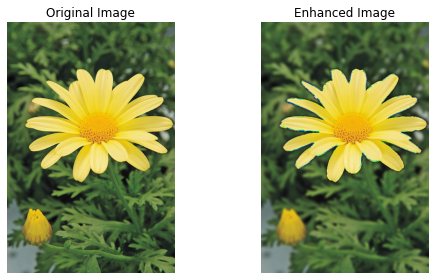

In [57]:
a = 11
sigma = 5
blured_b = cv.GaussianBlur(img_b,(a,a),sigma)
enhanced = img_f + blured_b

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

enhanced_ = cv.cvtColor(enhanced,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Enhanced Image")
ax[1].imshow(enhanced_)